In [1]:
from qiskit import *

In [2]:
qr = QuantumRegister(2)

In [3]:
cr = ClassicalRegister(2)

In [4]:
circuit = QuantumCircuit(qr, cr)

In [5]:
%matplotlib inline

In [6]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [7]:
circuit.h(qr[0])

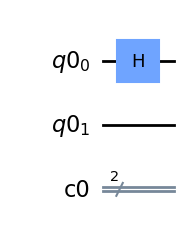

In [8]:
circuit.draw(output = 'mpl')

In [9]:
circuit.cx(qr[0], qr[1])

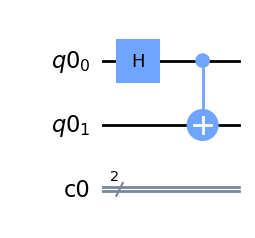

In [10]:
circuit.draw(output = 'mpl')

In [11]:
circuit.measure(qr, cr)

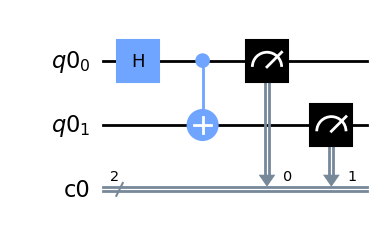

In [12]:
circuit.draw(output = 'mpl')

In [13]:
simulator = Aer.get_backend('qasm_simulator')

In [14]:
result = execute(circuit, backend = simulator).result()

In [15]:
from qiskit.tools.visualization import plot_histogram

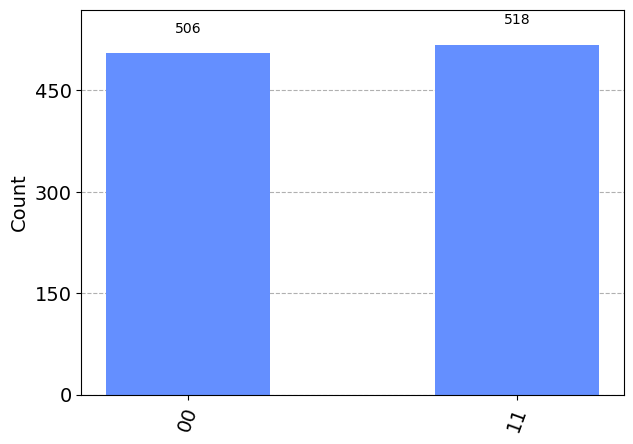

In [16]:
plot_histogram(result.get_counts(circuit))

In [17]:
from qiskit_ibm_provider import IBMProvider

In [18]:
IBMProvider.save_account('f4ff8b579fea0cd17500e9638f711a685bf3b399f8637a6734e66cb6453d3500a634b4456043973e7d79695c22b5d40282e618f6ba7f106cd0e5d7cccfbf73c0', overwrite=True)

In [19]:
provider = IBMProvider(instance = 'ibm-q/open/main')

In [20]:
backends = provider.backends()
print([b for b in provider.backends() if not b.configuration().simulator])

[<IBMBackend('ibmq_manila')>, <IBMBackend('ibm_lagos')>, <IBMBackend('ibm_perth')>, <IBMBackend('ibmq_quito')>, <IBMBackend('ibmq_jakarta')>, <IBMBackend('ibmq_lima')>, <IBMBackend('ibmq_belem')>, <IBMBackend('ibm_nairobi')>]


In [22]:
backend = provider.get_backend('ibmq_belem')

In [23]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
qc_transpiled = transpile(circuit, backend=backend)

In [24]:
qobj = assemble(qc_transpiled)
print(qobj)

QASM Qobj: 46409bd8-c435-4bed-bbea-1c80205b3977:
Config: {'init_qubits': True,
 'meas_level': <MeasLevel.CLASSIFIED: 2>,
 'memory': False,
 'memory_slots': 2,
 'n_qubits': 5,
 'parameter_binds': [],
 'parametric_pulses': [],
 'shots': 1024}
Header: {}
Experiments:

QASM Experiment:
Header:
{'clbit_labels': [['c0', 0], ['c0', 1]],
 'creg_sizes': [['c0', 2]],
 'global_phase': 0.7853981633974483,
 'memory_slots': 2,
 'metadata': {},
 'n_qubits': 5,
 'name': 'circuit-88',
 'qreg_sizes': [['q', 5]],
 'qubit_labels': [['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]}
Config:
{'memory_slots': 2, 'n_qubits': 5}

	Instruction: rz
		params: [ParameterExpression(1.5707963267949)]
		qubits: [0]

	Instruction: sx
		qubits: [0]

	Instruction: rz
		params: [ParameterExpression(1.5707963267949)]
		qubits: [0]

	Instruction: cx
		qubits: [0, 1]

	Instruction: measure
		qubits: [0]
		memory: [0]

	Instruction: measure
		qubits: [1]
		memory: [1]




In [25]:
import json
qobj_dict = qobj.to_dict()
qobj_json = json.dumps(qobj_dict)

job = backend.run(qobj_json)
print(job)

<IBMCircuitJob('chcb9lgo51arsodvdtcg')>


In [28]:
job_result = job.result()

counts = job_result.get_counts()
print(counts)

plot_histogram(counts)

IBMJobFailureError: 'Job failed: Unable to retrieve result for job circuit-runner_chcbab22qmrkbl016tb0_14dd_0. Job has failed: Internal Error. Error code: 9999.\'", "reason_code": null}'